# <font color='orange'> Technical Challenge </font>

In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

Columns:

- distance: (km)．
- consume: (L/100 km)．
- speed: (km/h )．
- temp_inside: (deg-C)．
- temp_outside: (deg-C) ．
- specials: "rain"，snow"，"climatization".
- gas_type: SP98,E10
- AC: 1 - climatization, 0 -no climatization
- rain: 1 - rain． / 0 - no rain
- sun: 1 - sun． / 0 - no sun．

In [353]:
data=pd.read_csv('measurements.csv')
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [354]:
# Limpiamos los titulos de las columnas
def clean_headers(x):
  for i in x.columns:
   x.columns = [i.lower().replace(' ','_')  for i in x.columns]
  return x

clean_headers(data)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [355]:
data.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
ac                int64
rain              int64
sun               int64
refill_liters    object
refill_gas       object
dtype: object

In [356]:
data.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
ac                 0
rain               0
sun                0
refill_liters    375
refill_gas       375
dtype: int64

In [357]:
# Veamos los nulos en porcentajes
for i in data.columns: 
  
  print( i, 100*sum(data[i].isnull()) / len(data[i]) ,"%")



distance 0.0 %
consume 0.0 %
speed 0.0 %
temp_inside 3.0927835051546393 %
temp_outside 0.0 %
specials 76.03092783505154 %
gas_type 0.0 %
ac 0.0 %
rain 0.0 %
sun 0.0 %
refill_liters 96.64948453608247 %
refill_gas 96.64948453608247 %


In [358]:
# eliminamos las columnas que sus valores nulos representan por lo menos el 70% de los datos
threshold = 0.7
data = data[data.columns[data.isnull().mean() < threshold]]
data


,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,SP98,0,0,0
384,"16,1","4,3",38,25,31,SP98,1,0,0
385,16,"3,8",45,25,19,SP98,0,0,0
386,"15,4","4,6",42,25,31,SP98,1,0,0


In [359]:
# Remplazamos las comas por puntos
data=data.replace({',':'.'}, regex=True)

In [360]:
# Cambiamos el tipo de de nuestras variables a numericas
data['distance']=pd.to_numeric(data['distance'])
data['consume']=pd.to_numeric(data['consume'])
data['temp_inside']=pd.to_numeric(data['temp_inside'])

In [361]:
data.dtypes

distance        float64
consume         float64
speed             int64
temp_inside     float64
temp_outside      int64
gas_type         object
ac                int64
rain              int64
sun               int64
dtype: object

In [362]:
# Vamos a revisar los valores unicos en busca de nulos
data['temp_inside'].unique()


array([21.5, 22.5, 20. ,  nan, 21. , 20.5, 23. , 23.5, 25. , 24. , 22. ,
       19. , 24.5, 25.5])

In [363]:
# Remplazamos los valores medios con los nulos
data['temp_inside']=data['temp_inside'].replace(np.nan, round(np.mean(data['temp_inside'])))

In [364]:
data['temp_inside'].unique()

array([21.5, 22.5, 20. , 22. , 21. , 20.5, 23. , 23.5, 25. , 24. , 19. ,
       24.5, 25.5])

In [365]:
# Revisamos que no tengamos mas valores nulos
data.isnull().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
ac              0
rain            0
sun             0
dtype: int64

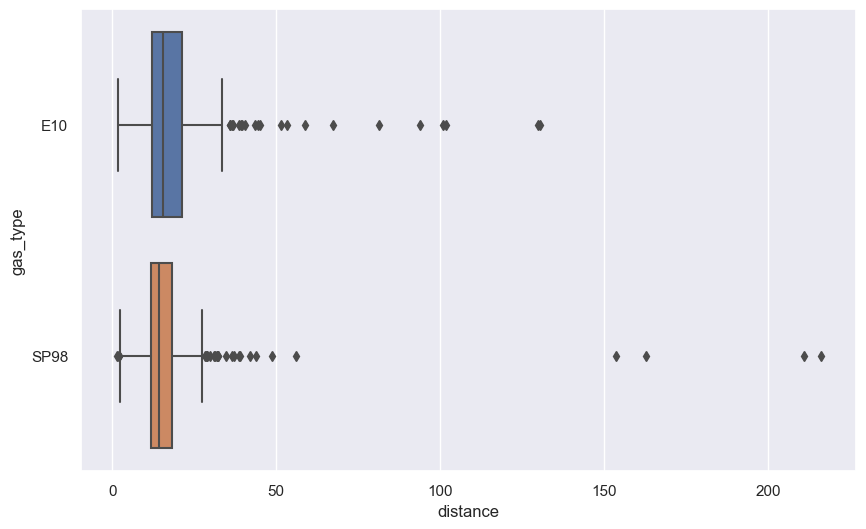

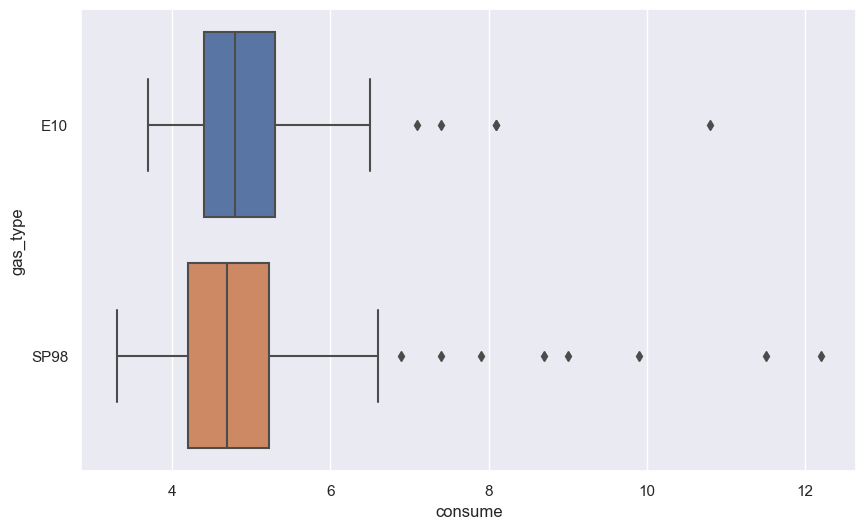

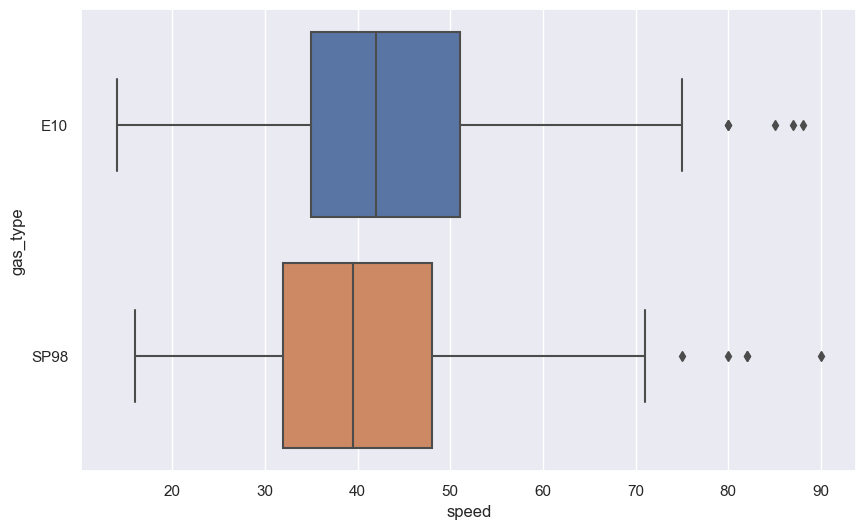

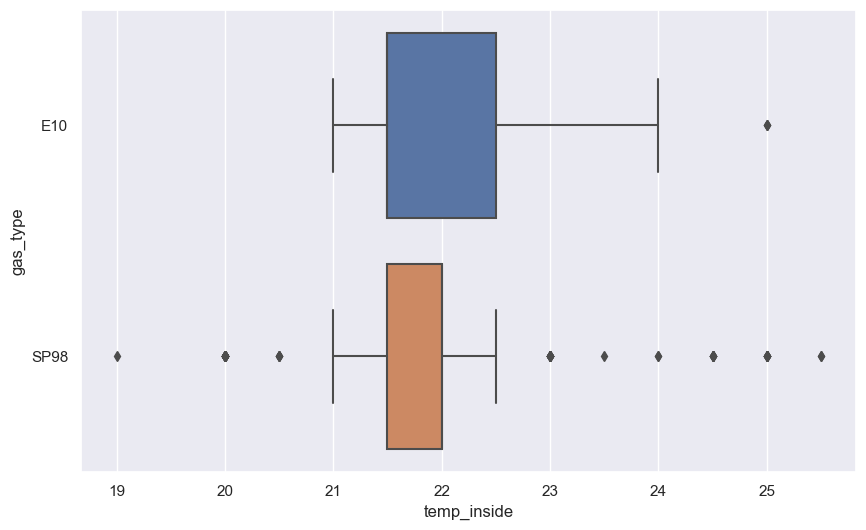

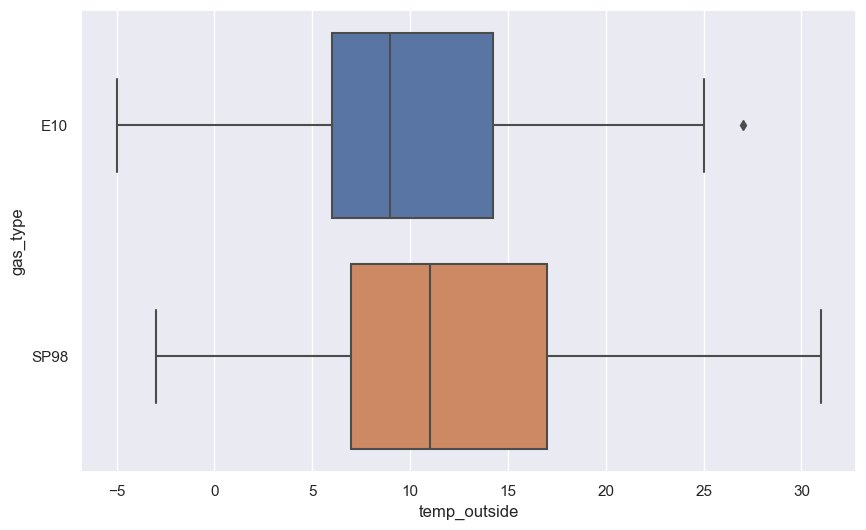

In [366]:
sns.set(rc={'figure.figsize':(10,6)})
for i in data.columns[0:5]:
    sns.boxplot( x = data[i], y="gas_type", data=data )
    plt.show()

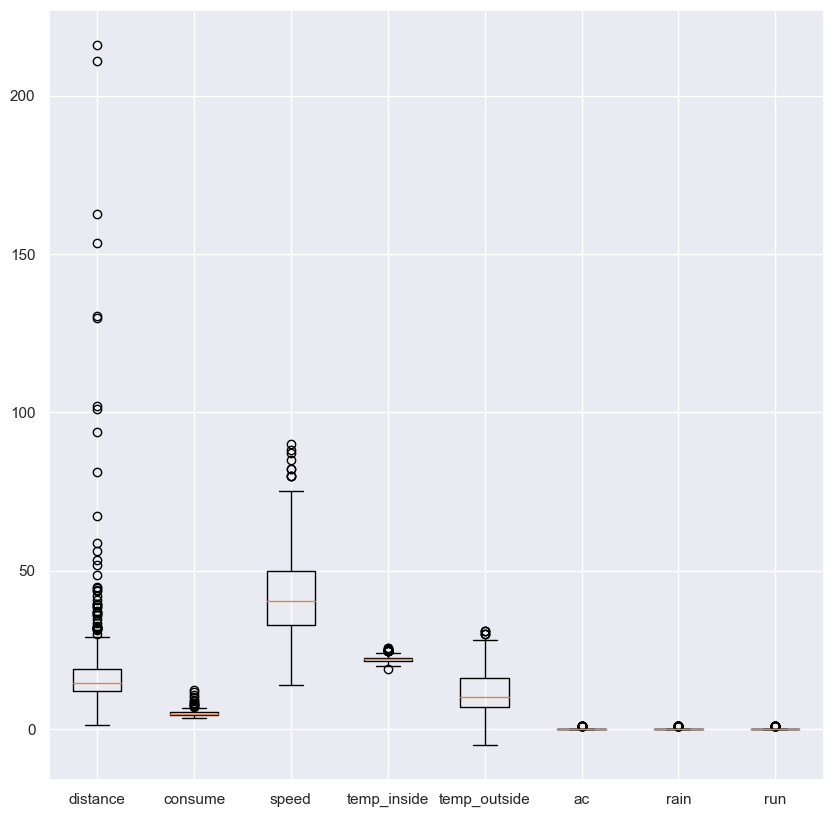

In [367]:
fig = plt.figure(figsize =(10, 10))

plt.boxplot(data.select_dtypes(np.number))
plt.xticks([1,2,3,4,5,6,7,8],['distance', 'consume','speed', 'temp_inside','temp_outside', 'ac','rain', 'run'])      
plt.show()

In [368]:
# Vamos a remover outliers
def re_outliers(x):
    for i in x.columns[0:5]:
        q75, q25 = np.percentile(x[i].loc[:i],[75,25])
        intr_qr = q75-q25
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        x.loc[x[i]< min,i] = np.mean(x[i])
        x.loc[x[i]> max,i] = np.mean(x[i])
    return x

In [369]:
re_outliers(data)

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26.0,21.500000,12.000000,E10,0,0,0
1,12.0,4.2,30.0,21.500000,13.000000,E10,0,0,0
2,11.2,5.5,38.0,21.500000,15.000000,E10,0,0,0
3,12.9,3.9,36.0,21.500000,14.000000,E10,0,0,0
4,18.5,4.5,46.0,21.500000,15.000000,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39.0,21.939257,18.000000,SP98,0,0,0
384,16.1,4.3,38.0,21.939257,11.358247,SP98,1,0,0
385,16.0,3.8,45.0,21.939257,19.000000,SP98,0,0,0
386,15.4,4.6,42.0,21.939257,11.358247,SP98,1,0,0


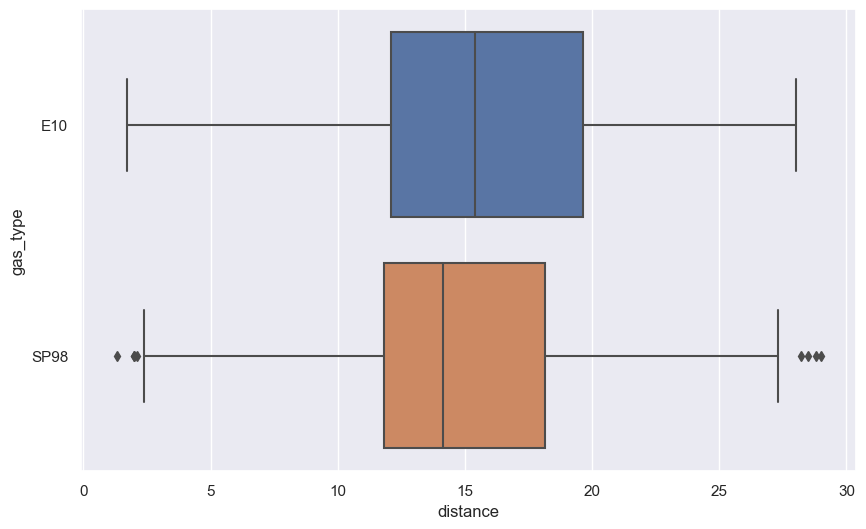

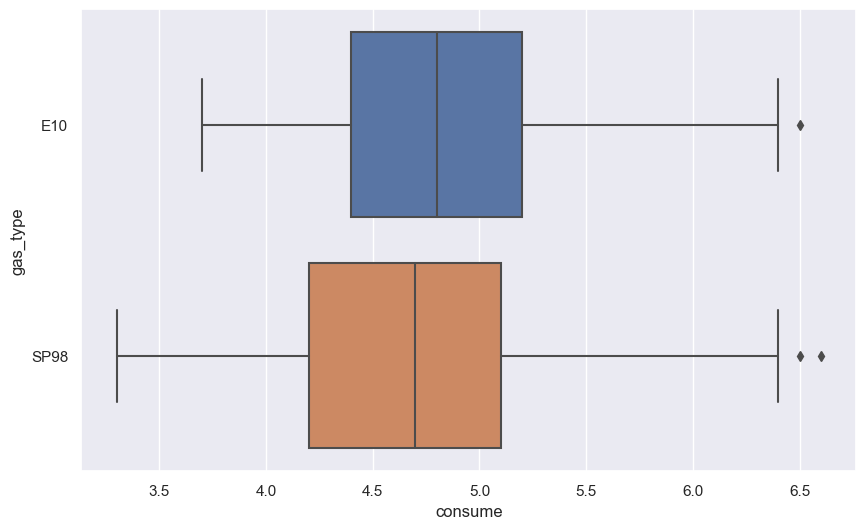

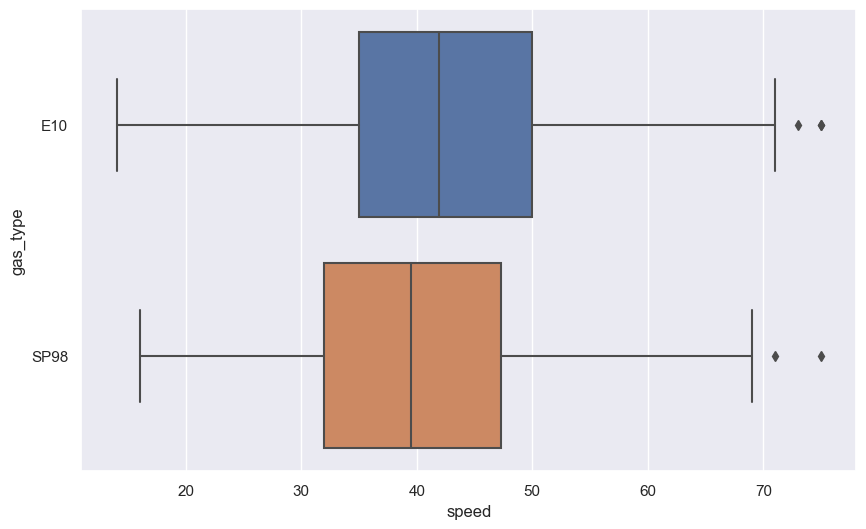

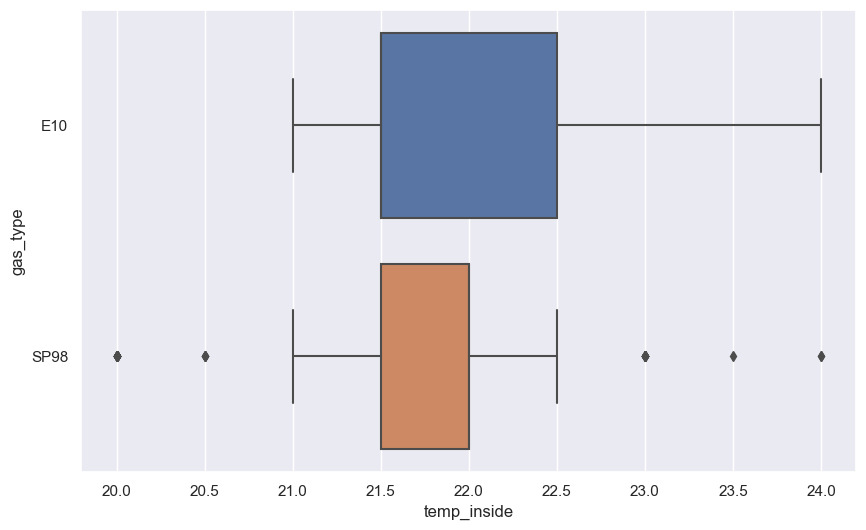

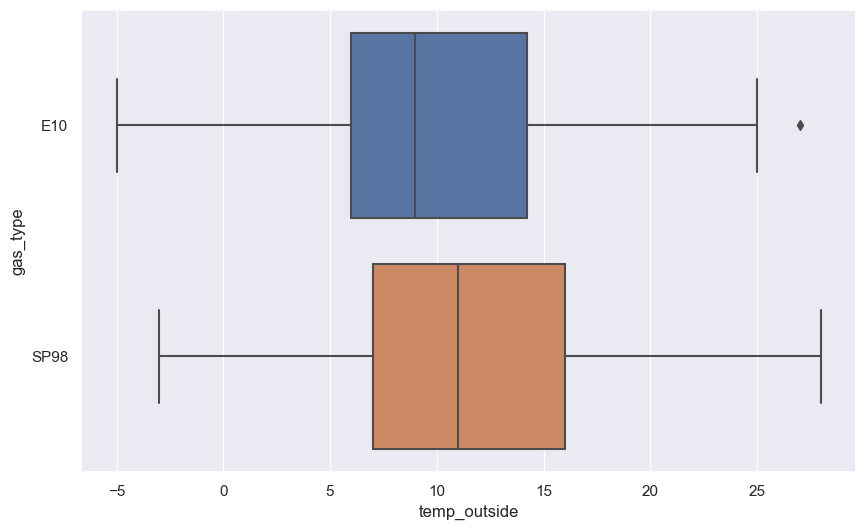

In [370]:
sns.set(rc={'figure.figsize':(10,6)})
for i in data.columns[0:5]:
    sns.boxplot( x = data[i], y="gas_type", data=data )
    plt.show()

In [371]:
X = data.select_dtypes('number')
y = data.select_dtypes('object')
# El tipo de Combustible es nuestra columna objetivo

In [372]:
X.head()

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun
0,28.0,5.0,26.0,21.5,12.0,0,0,0
1,12.0,4.2,30.0,21.5,13.0,0,0,0
2,11.2,5.5,38.0,21.5,15.0,0,0,0
3,12.9,3.9,36.0,21.5,14.0,0,0,0
4,18.5,4.5,46.0,21.5,15.0,0,0,0


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

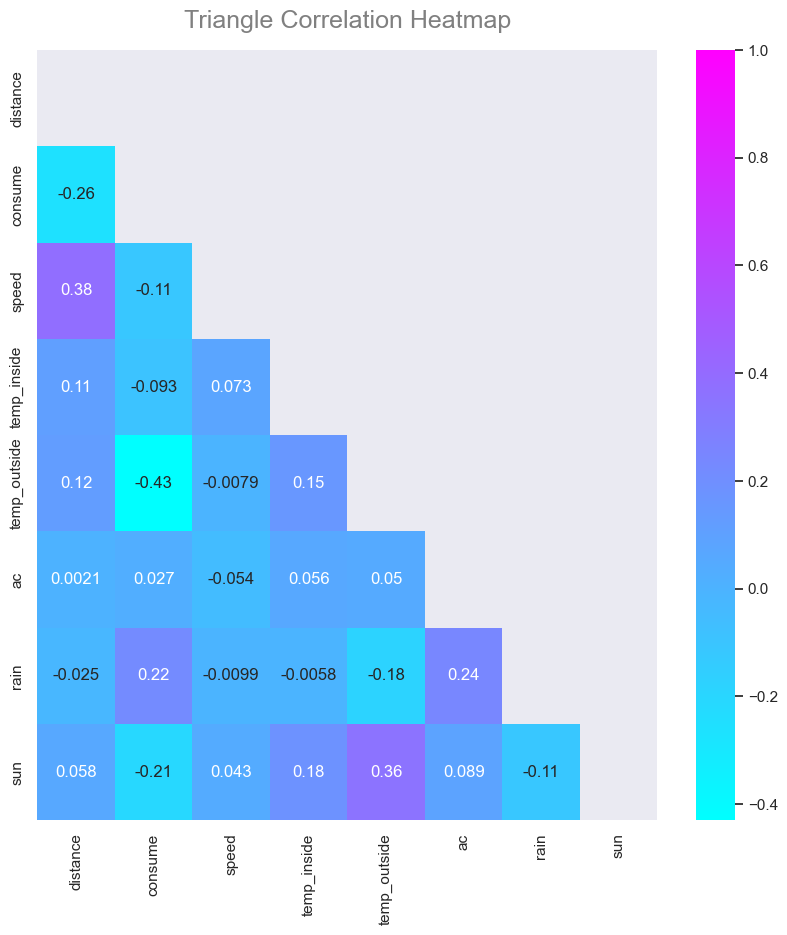

In [373]:
corr_matrix = X.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
plt.figure(figsize=(10,10))
mascara=np.triu(np.ones_like(X.corr(), dtype=np.bool)) 
heatmap = sns.heatmap(X.corr(), mask=mascara, vmax=1, annot=True, cmap='cool') 
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16, color='grey')
# No tenemos correlacion alta

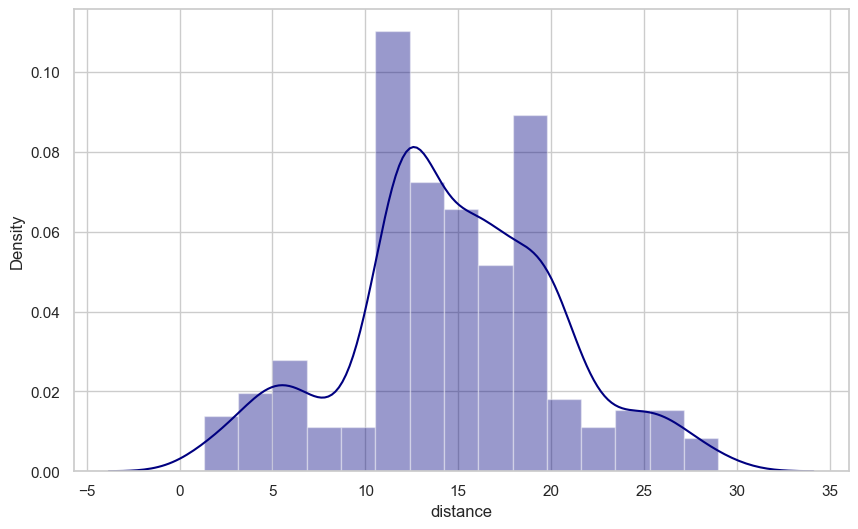

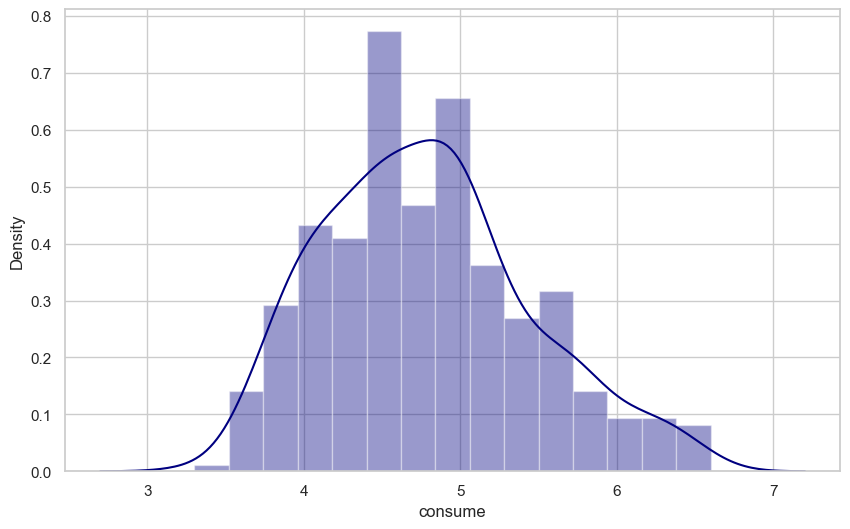

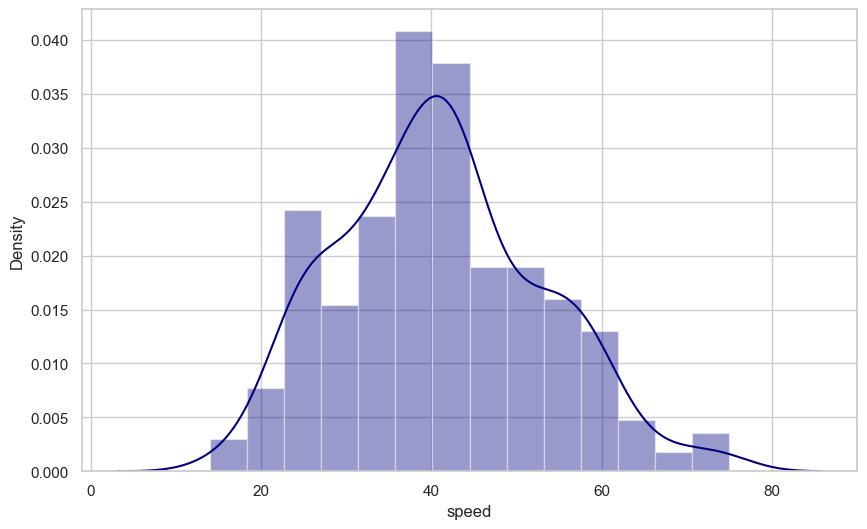

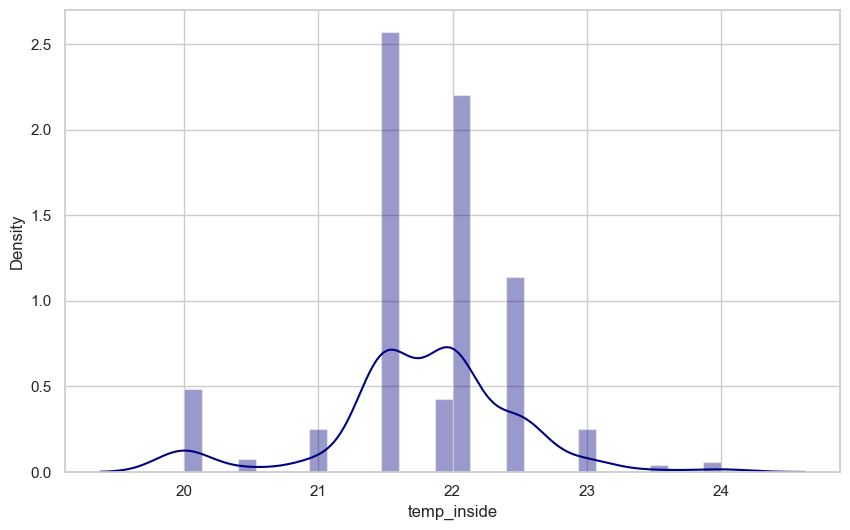

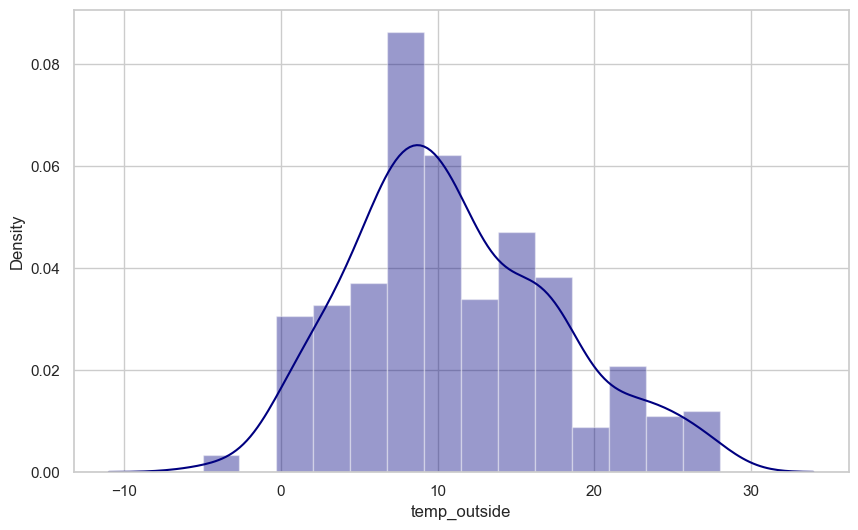

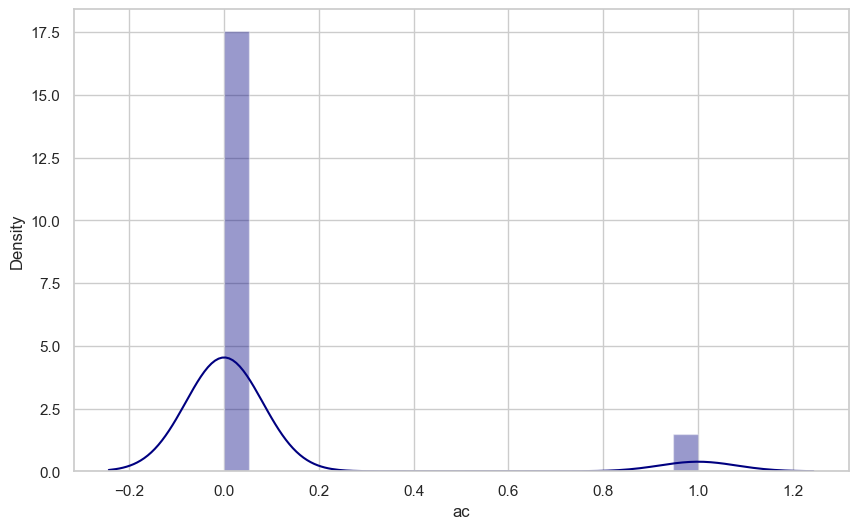

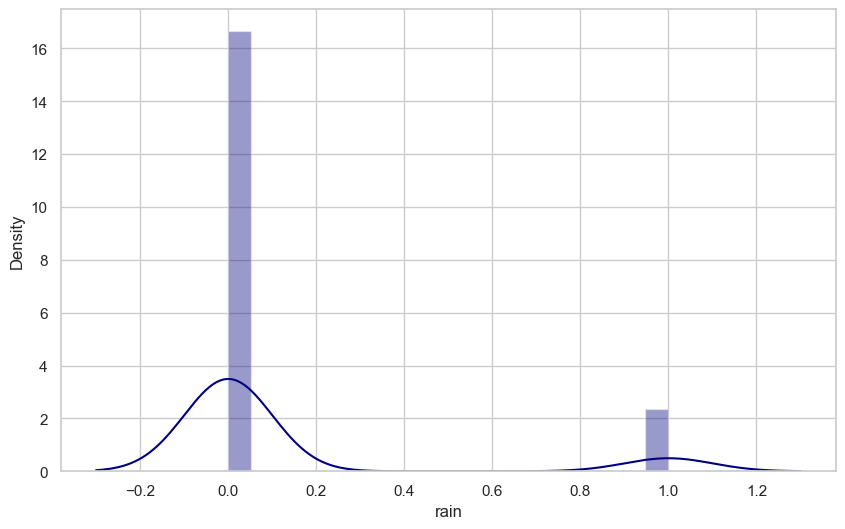

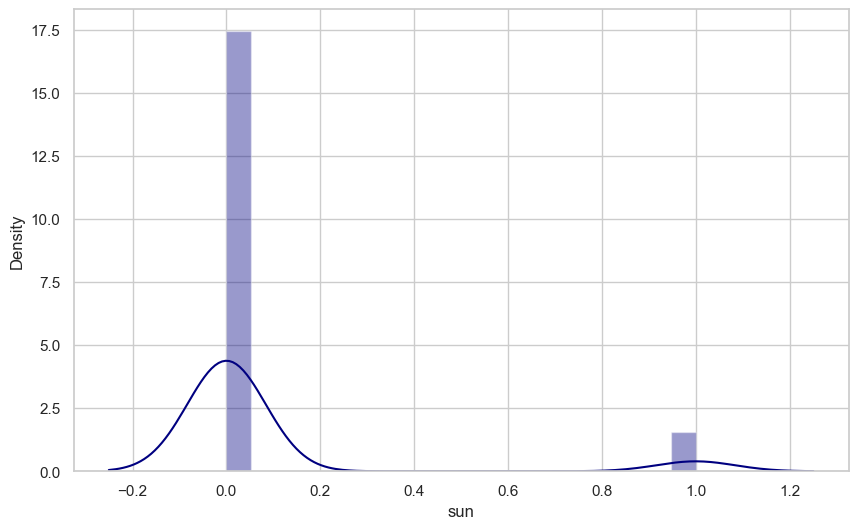

In [374]:
# Graficamos nuestras variables
sns.set_style("whitegrid")
for i in X.columns:
    sns.distplot(X[i], color='navy')
    plt.show()

gas_type       E10      SP98
mean      4.825387  4.749118
median    4.800000  4.700000


Text(0.5, 1.0, 'Tipo de Combustible y su consumo')

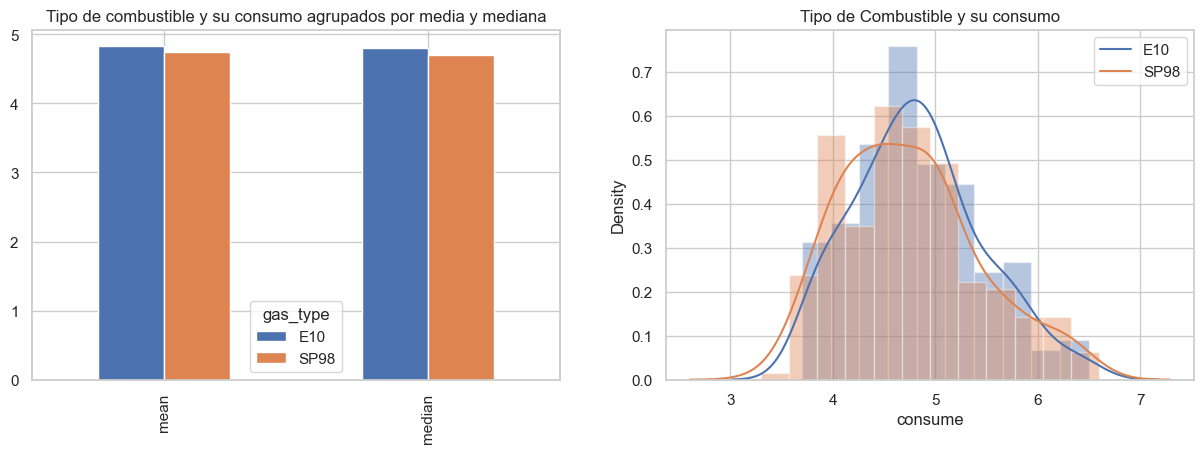

In [375]:
# Comparacion entre consumo y tipo de Combustible
gtc=data[["consume","gas_type"]]

plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
c=gtc.groupby("gas_type")["consume"].agg([np.mean,np.median]) # agrupame consume por el tipo de gas
dataConsume = pd.DataFrame(c.values.T,columns=c.index,index=c.columns)
print(dataConsume)
k1=dataConsume.plot(kind="bar", ax=ax1)
plt.title("Tipo de combustible y su consumo agrupados por media y mediana")

ax2=plt.subplot(2,2,2)
sns.distplot(gtc[gtc.gas_type=="E10"]["consume"],ax=ax2)
sns.distplot(gtc[gtc.gas_type=="SP98"]["consume"],ax=ax2)

plt.legend(["E10","SP98"])
plt.title("Tipo de Combustible y su consumo")
# en general, es mayor el consumo del combustible E10

Text(0.5, 1.0, 'LLuvia y Consumo')

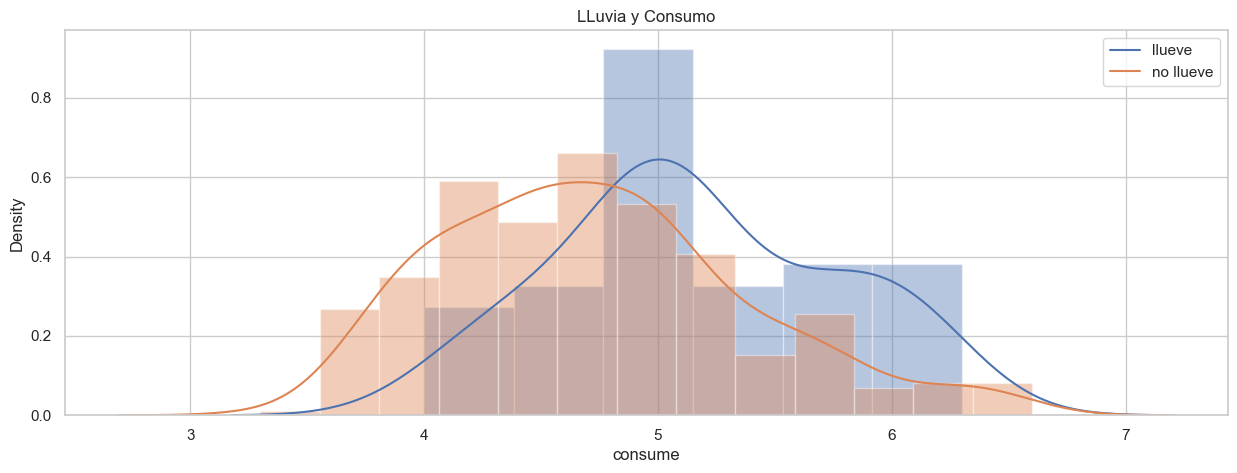

In [376]:
# Comparamos la lluvia con el consumo
plt.figure(figsize=(15,5))
sns.distplot(data[data.rain==1].consume)
sns.distplot(data[data.rain==0].consume)
plt.legend(["llueve","no llueve"])
plt.title("LLuvia y Consumo")

# Podemos observar que cuando llueve, el consumo aumenta 


Text(0.5, 1.0, 'E10 y  SP98: lluvia y consumo')

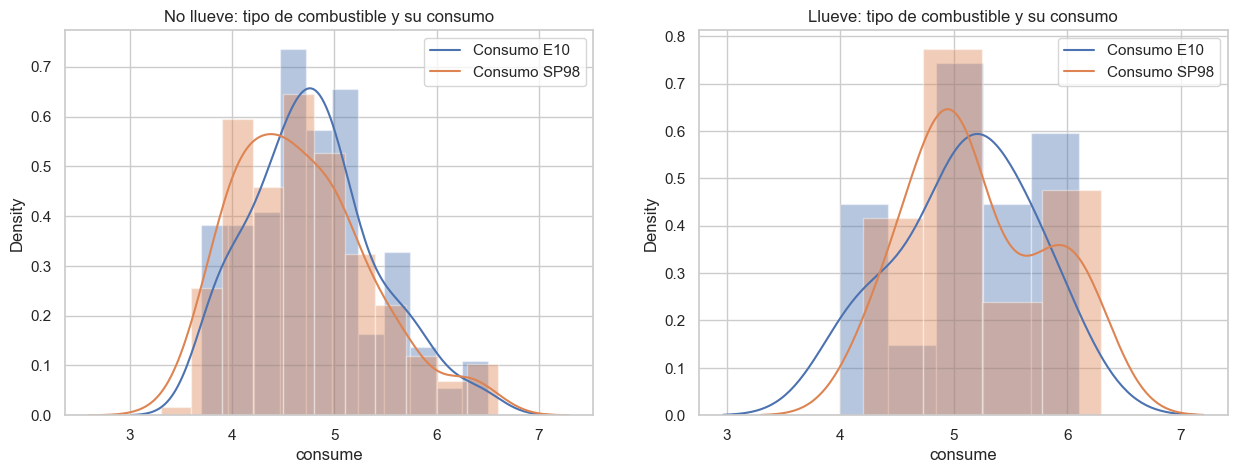

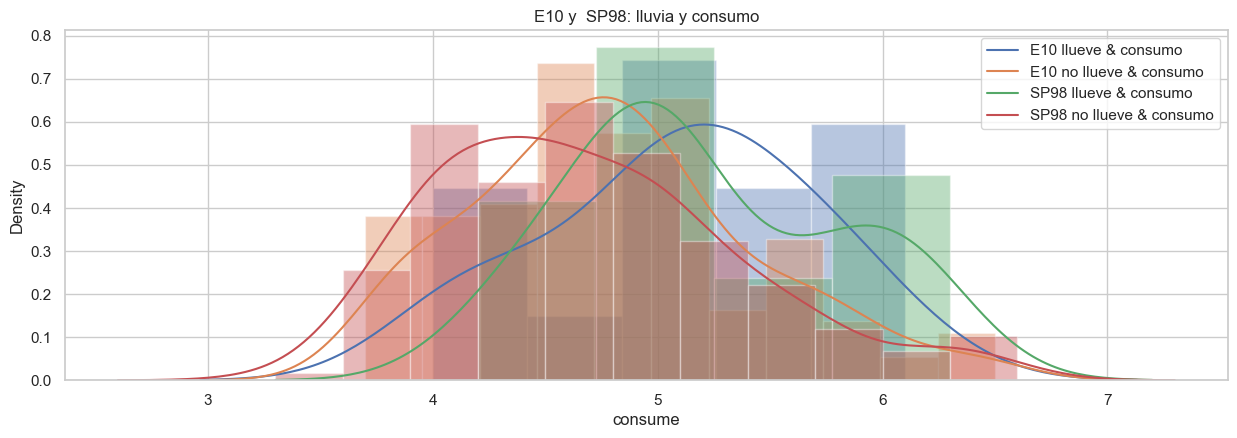

In [377]:
# Hagamos la comparacion  de si llueve o no llueve por tipo de combustible
plt.figure(figsize=(15,5))
ax1=plt.subplot(1,2,1)
sns.distplot(data[(data.rain==0)&(data.gas_type=="E10")].consume,ax=ax1)
sns.distplot(data[(data.rain==0)&(data.gas_type=="SP98")].consume,ax=ax1)
plt.legend(["Consumo E10","Consumo SP98"])
plt.title("No llueve: tipo de combustible y su consumo")

ax2=plt.subplot(1,2,2)
sns.distplot(data[(data.rain==1)&(data.gas_type=="E10")].consume,ax=ax2)
sns.distplot(data[(data.rain==1)&(data.gas_type=="SP98")].consume,ax=ax2)
plt.legend(["Consumo E10","Consumo SP98"])
plt.title("Llueve: tipo de combustible y su consumo")

plt.figure(figsize=(15,10))
ax1=plt.subplot(2,1,1)
sns.distplot(data[(data.rain==1)&(data.gas_type=="E10")].consume,ax=ax1)
sns.distplot(data[(data.rain==0)&(data.gas_type=="E10")].consume,ax=ax1)
sns.distplot(data[(data.rain==1)&(data.gas_type=="SP98")].consume,ax=ax1)
sns.distplot(data[(data.rain==0)&(data.gas_type=="SP98")].consume,ax=ax1)
plt.legend(["E10 llueve & consumo ","E10 no llueve & consumo", "SP98 llueve & consumo ","SP98 no llueve & consumo"])
plt.title("E10 y  SP98: lluvia y consumo")

# Cuando no llueve, hay mas consumo de E10 
# Cuando llueve hay mas consumo de SP98

Text(0.5, 1.0, 'Aire Acondicionado & Consumo')

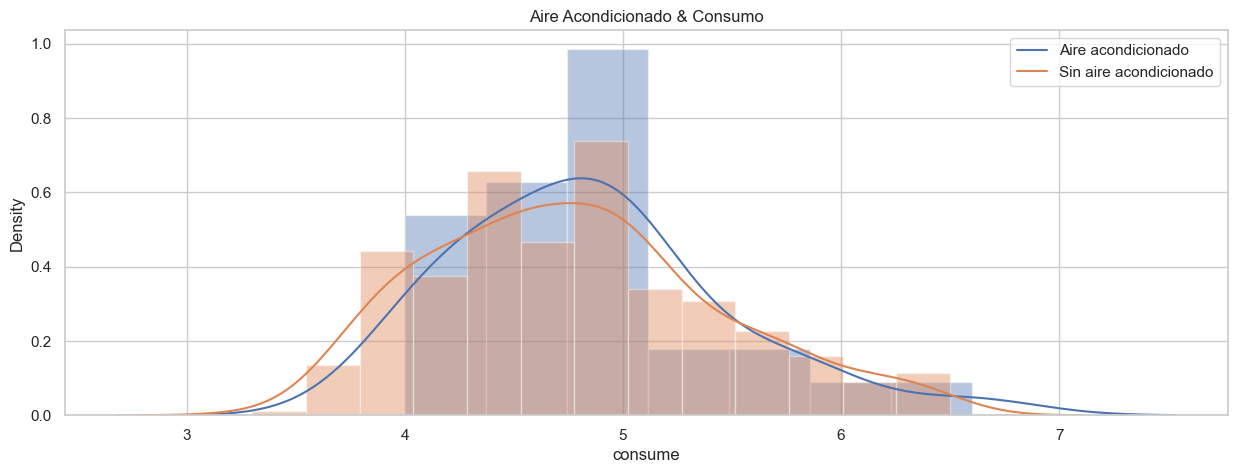

In [378]:

# Vamos a comparar el consumo con el uso del Aire acondicionado
plt.figure(figsize=(15,5))
sns.distplot(data[data.ac==1].consume)
sns.distplot(data[data.ac==0].consume)
plt.legend(["Aire acondicionado","Sin aire acondicionado"])
plt.title("Aire Acondicionado & Consumo")


# Podemos observar que el consumo de combustible es mayor con el uso del aire acondicionado sin que exista una diferencia muy grande

Text(0.5, 1.0, ' aire acondicionado y consumo segun el tipo de combustible')

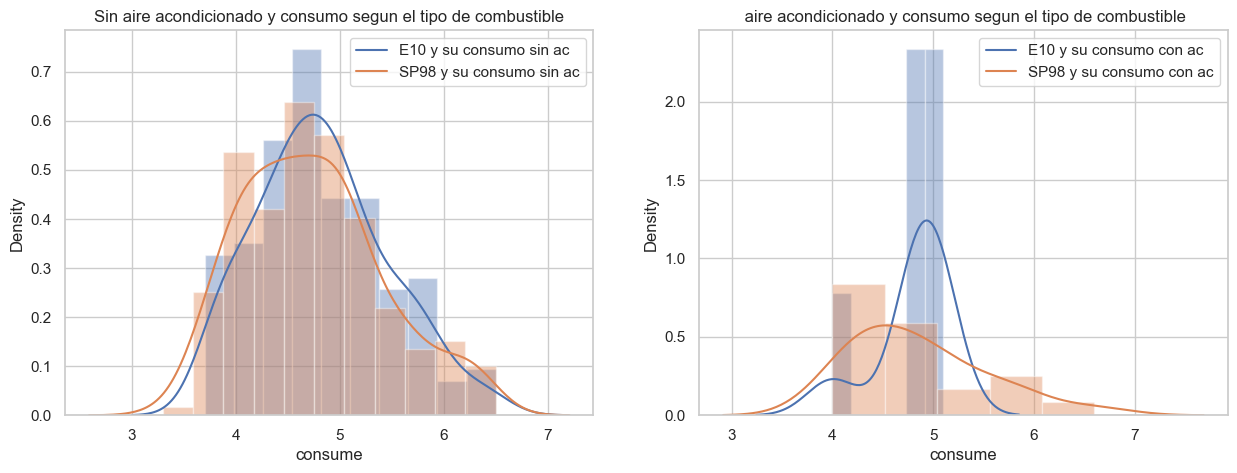

In [380]:
# Vamos a comparar el consumo de combustible segun su tipo con el uso del aire acondicionado

plt.figure(figsize=(15,5))
ax1=plt.subplot(1,2,1)
sns.distplot(data[(data.ac==0)&(data.gas_type=="E10")].consume,ax=ax1)
sns.distplot(data[(data.ac==0)&(data.gas_type=="SP98")].consume,ax=ax1)
plt.legend(["E10 y su consumo sin ac","SP98 y su consumo sin ac"])
plt.title("Sin aire acondicionado y consumo segun el tipo de combustible")

ax2=plt.subplot(1,2,2)
sns.distplot(data[(data.ac==1)&(data.gas_type=="E10")].consume,ax=ax2)
sns.distplot(data[(data.ac==1)&(data.gas_type=="SP98")].consume,ax=ax2)
plt.legend(["E10 y su consumo con ac","SP98 y su consumo con ac"])
plt.title(" aire acondicionado y consumo segun el tipo de combustible")


Text(0.5, 1.0, ' Consumo de E10 y SP98 segun el uso del ac')

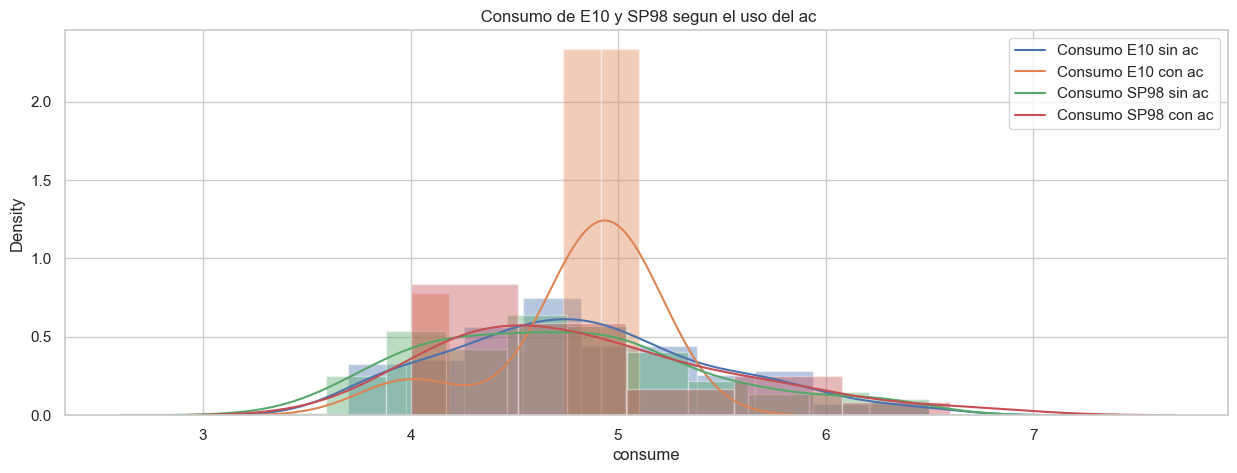

In [384]:
plt.figure(figsize=(15,5))
sns.distplot(data[(data.ac==0)&(data.gas_type=="E10")].consume)
sns.distplot(data[(data.ac==1)&(data.gas_type=="E10")].consume)
sns.distplot(data[(data.ac==0)&(data.gas_type=="SP98")].consume)
sns.distplot(data[(data.ac==1)&(data.gas_type=="SP98")].consume)
plt.legend(["Consumo E10 sin ac","Consumo E10 con ac","Consumo SP98 sin ac","Consumo SP98 con ac"])
plt.title(" Consumo de E10 y SP98 segun el uso del ac")

# Podemos observar que el consumo de combustible se mantiene muy parecido con o sin aire para el SP98,
#  mientras que para el E10  aumenta considerablemente con el uso de aire acondicionado cuando el consumo de gasolina ronda los 5litros por cada 100 km
 

In [ ]:
# Con el analisis de estas variables podemos ver que el consumo de E10 es mayor que el del sp98 ( en la mayoria de los casos)
# Vamos a ver que pasa con un AB TEST

In [385]:
data.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'gas_type', 'ac', 'rain', 'sun'],
      dtype='object')

In [387]:
# Aqui vamos a tomar en cuenta todas las variables en relacion al consumo, para ver su relevancia
# H0: E10 consume = SP98 consume; H1: E10 consume > SP98 consume
import statsmodels.api as sm
formula ="consume ~ gas_type+distance+rain+speed+temp_outside+ac+temp_inside"
model = sm.formula.ols(formula, data=data).fit()

In [388]:
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

                  sum_sq     df          F        PR(>F)
gas_type        0.251211    1.0   0.755567  3.852682e-01
distance        5.323532    1.0  16.011559  7.569592e-05
rain            3.332825    1.0  10.024121  1.669756e-03
speed           0.226397    1.0   0.680932  4.097838e-01
temp_outside   21.185239    1.0  63.718730  1.718131e-14
ac              0.024656    1.0   0.074158  7.855241e-01
temp_inside     0.041899    1.0   0.126019  7.227930e-01
Residual      126.342613  380.0        NaN           NaN


In [ ]:
# Dado que distance , rain, temp  outside son menores a 0.5, podemos concluir que ellos tienen un valor de significancia alta en el consumo de combustible, mientras que el resto no la tiene

In [392]:
# Vamos a tomar los factores que tienen valor de signifcancia y agregaremos el tipo de combustible a cada uno de ellos
formula ="consume ~ gas_type+rain+speed+temp_outside+rain:gas_type+speed:gas_type+temp_outside:gas_type"
model = sm.formula.ols(formula, data=data).fit()

In [393]:
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

                           sum_sq     df          F        PR(>F)
gas_type                 0.125979    1.0   0.363928  5.466926e-01
rain                     3.509811    1.0  10.139121  1.571291e-03
rain:gas_type            0.150624    1.0   0.435121  5.098863e-01
speed                    2.296384    1.0   6.633781  1.038340e-02
speed:gas_type           0.004035    1.0   0.011657  9.140792e-01
temp_outside            25.237768    1.0  72.906712  3.310287e-16
temp_outside:gas_type    0.064024    1.0   0.184951  6.673965e-01
Residual               131.542785  380.0        NaN           NaN


In [ ]:

 # Dado que el valor p pra el efecto de interaccion entre la temperatura fuera y el tipo de combustible  es mayor a 0.5. podemos inferir que no hay un efecto de interaccion significatico entre la temperatura afuera y el tipo de combustible
#es decir que  Temp_outside es el que mayor nivel de significancia tiene, sin que afecte el tipo de combustible que se usa



In [ ]:
# Precio E10 en europa = 1.815 euros por litro
# precio sp98 en europa = 1.730 euros por litro 
# Precios obtenidos de https://plein-moins-cher.fr/es/carte-carburants-prix-stations-sp95-e10.html

# Y segun el analisis estadistico, el combustible que mas consume durante la mayoria de los factores es el E10, tomando en cuenta esto y el precio que es mayor, la recomendacion es el uso de sp98